# CSC 6220 Homework 3
#### Rob Gillen, T00215814

In [82]:
# setup some things for subsequent computations
%matplotlib inline

import math
import matplotlib
import numpy as np
import scipy.spatial
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

## Problem 10.2 (12pts)
__Suppose that the data mining task is to cluster points (with `(x, y)` representing location) into three clusters, where the points are:__

$$A_1(2,10),A_2(2,5),A_3(8,4),B_1(5,8),B_2(7,5),B_3(6,4),C_1(1,2),C_2(4,9)$$

__The distance function is Euclidean distance. Suppose initially we assign $A_1$, $B_1$, and $C_1$ as the center of each cluster, respectively. Use the k-means algorithm to show only:__

__(a) The three cluster centers after the first round of execution__

Calculate disance from non-centroids to each centroid

|   |A_1|B_1|C_1|
|---|----:|----:|----:|
|A_2|5.0 | 4.2426406871192848 | 3.1622776601683795 |
|A_3|8.4852813742385695 | 5.0 | 7.2801098892805181 |
|B_2|7.0710678118654755 | 3.6055512754639891 | 6.7082039324993694 |
|B_3|7.2111025509279782 | 4.1231056256176606 | 5.3851648071345037 |
|C_2|2.2360679774997898 | 1.4142135623730951 | 7.6157731058639087 |

assign based on minimum distance:

- A1
- B1, A3, B2, B3, C2
- C1, A2

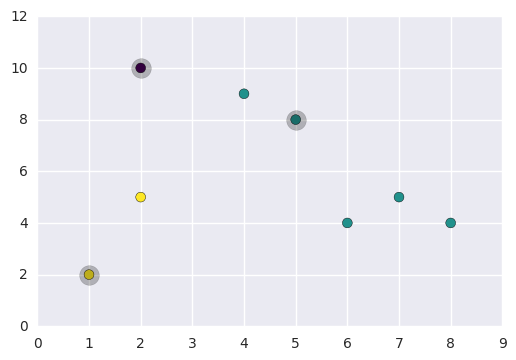

In [102]:
A1 = np.array((2,10))
A2 = np.array((2,5))
A3 = np.array((8,4))
B1 = np.array((5,8))
B2 = np.array((7,5))
B3 = np.array((6,4))
C1 = np.array((1,2)) 
C2 = np.array((4,9))
X = np.array([A1,A2,A3,B1,B2,B3,C1,C2])

y_kmeans = np.array([0, 2, 1, 1, 1, 1, 2, 1])
plt.scatter(X[:, 0], X[:, 1],c=y_kmeans, s=50, cmap='viridis')


centers = np.array([A1, B1, C1])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.25);

In [60]:
# caluclate the distance b/t each non-centroid and each centroid, assign to the lowest
A1 = np.array((2,10))
A2 = np.array((2,5))
A3 = np.array((8,4))
B1 = np.array((5,8))
B2 = np.array((7,5))
B3 = np.array((6,4))
C1 = np.array((1,2)) 
C2 = np.array((4,9))

a2 = []
a2.append(np.linalg.norm(A1 - A2))
a2.append(np.linalg.norm(B1 - A2))
a2.append(np.linalg.norm(C1 - A2))
a2

a3 = []
a3.append(np.linalg.norm(A1 - A3))
a3.append(np.linalg.norm(B1 - A3))
a3.append(np.linalg.norm(C1 - A3))
a3

b2 = []
b2.append(np.linalg.norm(A1 - B2))
b2.append(np.linalg.norm(B1 - B2))
b2.append(np.linalg.norm(C1 - B2))
b2

b3 = []
b3.append(np.linalg.norm(A1 - B3))
b3.append(np.linalg.norm(B1 - B3))
b3.append(np.linalg.norm(C1 - B3))
b3

c2 = []
c2.append(np.linalg.norm(A1 - C2))
c2.append(np.linalg.norm(B1 - C2))
c2.append(np.linalg.norm(C1 - C2))
c2

[2.2360679774997898, 1.4142135623730951, 7.6157731058639087]

__(b) The final three clusters__

In my calculations, I ended up with the following final clusters:

- A1, C2
- B1, A3, B2, B3
- C1, A2

> _However_, after round 3, the distance of B1 from the centroid of cluster 1 and cluster 2 was equal... you could argue that it should move and would have provided better/higher separation between the clusters. My calculations are shown below. Further, I ran the sklearn version of kmeans just to see what it would do... it split it into three, but with a different assignment


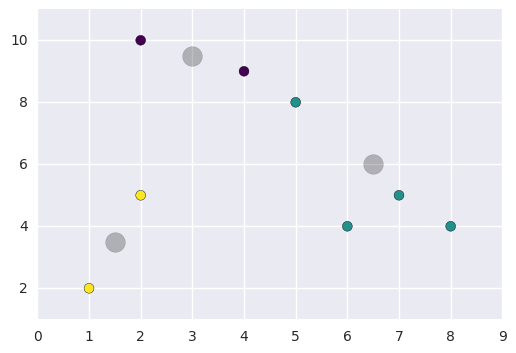

In [103]:
# my hand-calulcated, final clusters (see caveat above)
y_kmeans = np.array([0, 2, 1, 1, 1, 1, 2, 0])
plt.scatter(X[:, 0], X[:, 1],c=y_kmeans, s=50, cmap='viridis')
centers = np.array([[3,9.5], [6.5, 6.0], [1.5,3.5]])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.25);

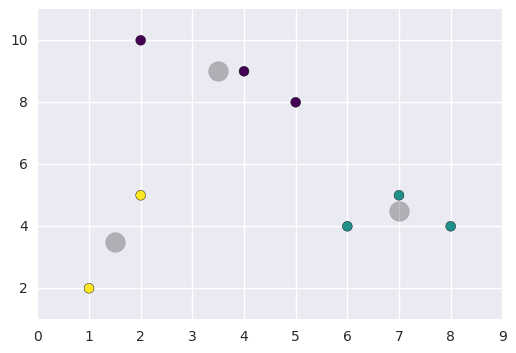

In [107]:
# if I let stuff go foward (allow B1 to move to clus1 even though it is equidistant to clus2), I get the following:
y_kmeans = np.array([0, 2, 1, 0, 1, 1, 2, 0])
plt.scatter(X[:, 0], X[:, 1],c=y_kmeans, s=50, cmap='viridis')
centers = np.array([[3.5,9.0], [7.0, 4.5], [1.5,3.5]])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.25);

With the above, allowing things to move further, I end up with:

- A1, B1, C2
- A3, B2, B3
- C1, A2


In [106]:
# round 1 clusters
clus01 = [A1]
clus02 = [A3, B1, B2, B3, C2]
clus03 = [A2, C1]

# after round 1, re-calculate centers
x,y = zip(*clus01)
center = (max(x) + min(x))/2., (max(y)+min(y))/2.
center

x,y = zip(*clus02)
center = (max(x) + min(x))/2., (max(y)+min(y))/2.
center

x,y = zip(*clus03)
center = (max(x) + min(x))/2., (max(y)+min(y))/2.
center

# round 2 clusters
clus01 = [A1, C2]
clus02 = [A3, B1, B2, B3]
clus03 = [A2, C1]

# after round 2, re-calculate centers
x,y = zip(*clus01)
center = (max(x) + min(x))/2., (max(y)+min(y))/2.
center

x,y = zip(*clus02)
center = (max(x) + min(x))/2., (max(y)+min(y))/2.
center

x,y = zip(*clus03)
center = (max(x) + min(x))/2., (max(y)+min(y))/2.
center

# round 3 clusters
clus01 = [A1, C2]
clus02 = [A3, B1, B2, B3]
clus03 = [A2, C1]

# forced move-forward to see what happens if I let B1 move as part of round 3
clus01 = [A1, B1, C2]
clus02 = [A3, B2, B3]
clus03 = [A2, C1]

x,y = zip(*clus01)
center = (max(x) + min(x))/2., (max(y)+min(y))/2.
center

x,y = zip(*clus02)
center = (max(x) + min(x))/2., (max(y)+min(y))/2.
center

x,y = zip(*clus03)
center = (max(x) + min(x))/2., (max(y)+min(y))/2.
center

(1.5, 3.5)

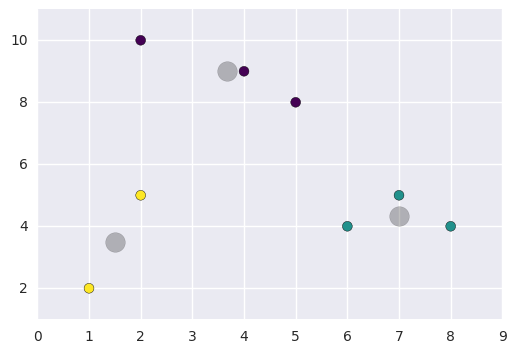

In [108]:
# on a whim, I let sklearn take a shot and see what i get... the below is pretty 
# similar to my secondary answer above. The centroids aren't exactly the same (expected)
# but the clusters are
from sklearn.cluster import KMeans
C = np.array([A1,B1,C1])
kmeans = KMeans(n_clusters=3, init=C, n_init=1)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.25);


## Problem 10.6 (12pts)
__Both _k-means_ and _k-medoids_ algorithms can perform effective clustering.__

__(a) Illustrate the strength and weakness of _k-means_ in comparison with _k-medoids_ __

The biggest problem that K-Means has as compared with k-mediods is its sensitivity to the initialzation of the centroids. It is quite possible for convergence to occur and to find local optimizations while a global optimization is compeltely off. An example of this might be if multiple centroids were initilalized particularly close to each other, they may not move sufficently to capture the overall structure of the data. While not directly in answer to this question, many implementations attempt to minimize this affect by running the algorithm multiple times, with multiple random initializations to attempt to obtain a final clustering that is as accurate as possible givne the selected value of $k$. K-means has advantages over k-mediod with respect to lower computational complexity and a generaly quicker convergence.

By contrast, k-mediod uses actual data points for the centroids, and attempst to minimize the cost function across the entire graph as it selects different candidate centroids. This allows for/accounts for the scenario wherein the initialization happened to select two very close to each other, they will more freely diverge to match the structure of the data (vs. being bound to the central location of those nodes grouped based on initial location)



__(b) Illustrate the strength and weakness of these schemes in comparison with a hierarchical clustering scheme (e.g., AGNES)__

## Problem 10.16 (not `c` or `e`) (16pts)

__Describe each of the following clustering algorithms in terms of the following criteria: (1) shapes of clusters that can be determined; (2) input parameters that must be specified; and (3) limitations.__

__(a) k-means__

1. Shapes: blobs, or generally circles from a central point
2. Input: Number of clusters you desire to create (may not be optimal/match the data)
3. Limitations: sensitive to outliers, sensitive to initialization values

__(b) k-medoids__

1. Shapes: blobs, or generally circles from a central point
2. Input: Number of clusters you desire to create
3. Limitations: high computational complexity, esp. as $N$ grows

__(d) BIRCH__

1. aasdf
2. asdfasdf
3. asdfasdf

__(f) DBSCAN__

1. aasdf
2. asdfasdf
3. asdfasdf

## Problem 11.1 (15pts)

Traditional clustering methods are rigid in that they require each object to belong exclusively to only one cluster. Explain why this is a special case of fuzzy clustering. You may use k-means as an example.

## Problem 12.1 (15pts)

Give an application example where global outliers, contextual outliers, and collective outliers are all interesting. What are the attributes, and what are the contextual and behavioral attributes? How is the relationship among objects modeled in collective outlier detection?

The resume data processing application I am working on for this class fits this description.

From the global vantage point, resumes that are not connected to any others are, both outliers and quite interesting (why aren't they connected? are the schools/references fake? etc.)

Contextually, resumes that 

## Additional Problem 1 (15 points)
__Briefly outline how to compute the dissimilarity between objects described by the following
types of variables__

__a. Asymmetric binary variables__


__b. Nominal variables__

__c. Numerical (interval-scaled) variables__

## Additional Problem 2 (15 points)
__Given two objects represented by the tuples `(22, 1, 42, 10)` and `(20, 0, 36, 8)`__

__a. Compute the Euclidean distance between the two objects__

In [33]:
import math
a = np.array((22, 1, 42, 10))
b = np.array((20, 0, 36, 8))

# manual approach
dist = math.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2 + (b[2]-a[2])**2 + (b[3]-a[3])**2)
dist

6.708203932499369

In [34]:
# numpy approach
dist = np.linalg.norm(a - b)
dist

6.7082039324993694

In [35]:
# scipy approach
dist = scipy.spatial.distance.euclidean(a, b)
dist

6.7082039324993694

__b. Compute the Manhattan distance between the two objects.__

In [38]:
# manual approach
man_dist = abs(a[0] - b[0]) + abs(a[1] - b[1]) + abs(a[2] - b[2]) + abs(a[3] - b[3])
man_dist

11

In [39]:
# scipy approach
man_dist = scipy.spatial.distance.cityblock(a, b)
man_dist

11

__c. Compute the Minkowski distance between the two objects, using $q = 3$.__

In [53]:
q=3
min_dist = (abs(a[0] - b[0])**q + abs(a[1] - b[1])**q + abs(a[2] - b[2])**q + abs(a[3] - b[3])**q)**(1/float(q))
min_dist

6.1534494936636817

In [41]:
# scipy approach
min_dist = scipy.spatial.distance.minkowski(a, b, p=3)
min_dist

6.1534494936636817